<a href="https://colab.research.google.com/github/mardmikon/-Intelligent-systems-and-technologies/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%205-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 5-6**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import time


data_headers = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive",
                "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font",
                "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data",
                "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
                "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest","capital_run_length_total"]
data = pd.read_csv('spambase.data', names=data_headers)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:-1],
                                                    data.iloc[:,-1],
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=data.iloc[:,-1],
                                                    random_state=200)
_standartScaler = StandardScaler()
x_train = _standartScaler.fit_transform(x_train)
x_test = _standartScaler.transform(x_test)

#**SVM-классификатор**

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
import seaborn as sns

_SVM = SVC()
_SVM.fit(x_train, y_train)
y_train_pred = _SVM.predict(x_train)
y_test_pred = _SVM.predict(x_test)

**Расчет общей стоимости, Recall, Precision, F1-measure**

Обучающая выборка

In [13]:
svmAccuracyTrain = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}, " 
      f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_train, y_train_pred, average='weighted')}")

Accuracy: 0.9465838509316771, Recall: 0.9465838509316771, Precision: 0.9464271899981516


Тестовая выборка

In [14]:
svmAccuracyTest = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}, "
      f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}, "
      f"Precision: {f1_score(y_test, y_test_pred, average='weighted')}")

Accuracy: 0.9362780593772628, Recall: 0.9362780593772628, Precision: 0.9358845209134183


**Оценка числа опорных векторов**

In [15]:
print(f"get support vectors : {_SVM.support_vectors_}, \n\n"
      f"get indices of support vectors: {_SVM.support_}, \n\n"
      f"get number of support vectors for each class: {_SVM.n_support_}")

get support vectors : [[-0.55539422 -0.05075681  5.61371775 ... -0.11861253 -0.22673145
  -0.44256877]
 [-0.55539422 -0.05075681 -0.45774374 ... -0.1161301  -0.19459704
  -0.36482594]
 [-0.06469328 -0.05075681 -0.45774374 ... -0.0647206  -0.09819384
   0.33162026]
 ...
 [ 0.36712355 -0.05075681 -0.12206198 ... -0.11878572 -0.19459704
  -0.35672773]
 [-0.55539422 -0.05075681  3.01583279 ... -0.09840666 -0.19459704
  -0.43123128]
 [-0.55539422 -0.05075681 -0.45774374 ... -0.08792848 -0.19459704
  -0.42151342]], 

get indices of support vectors: [   5    7    9   15   20   21   33   41   56   57   67   70   74  112
  114  137  138  142  161  163  171  174  182  184  185  186  200  201
  210  225  245  250  251  263  273  280  288  289  290  293  294  297
  300  346  361  362  368  376  379  387  388  404  407  413  418  422
  427  430  432  434  443  444  447  452  455  473  500  512  522  528
  541  551  554  563  567  575  578  579  589  594  595  600  616  618
  635  641  643  649  652

**Рассмотреть различные типы ядра (линейное, RBF, полиномиальное,сигмоидное (тангенсальное)), различные сочетания значений параметра регуляризации С параметров ядра.**

In [18]:
gridParameters = {'kernel': ('linear', 'rbf','poly','sigmoid'), 
                  'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                  'gamma': [1, 0.5, 0.01, 0.005, 0.0001]}
gridSearch = GridSearchCV(SVC(), gridParameters, verbose=1, cv=3, n_jobs=-1)
gridSearchResults = gridSearch.fit(x_train, y_train)
gridSearchBestTrainSVM = gridSearchResults.best_score_
gridSearchBestTestSVM = accuracy_score(gridSearchResults.predict(x_test), y_test)
print(f"Grid search best score: {gridSearchBestTrainSVM}, \n"
      f"Grid search best parameters: {gridSearchResults.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Grid search best score: 0.930125945633555, 
Grid search best parameters: {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}


**Визуализация: изобразить объекты разных классов и
опорные векторы разных классов разным цветом**

In [52]:
tsne_train = TSNE(init='random', perplexity=10).fit_transform(x_train)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Data T-SNE projection')]

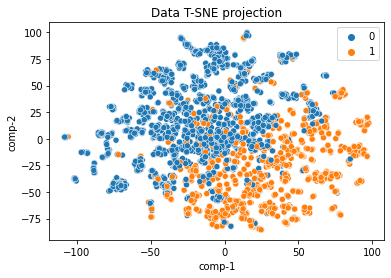

In [59]:
df_train = pd.DataFrame()
df_train["y"] = y_train
df_train["comp-1"] = tsne_train[:,0]
df_train["comp-2"] = tsne_train[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train.y.tolist(),
                data=df_train).set(title="Data T-SNE projection")

[Text(0.5, 1.0, 'Data T-SNE projection')]

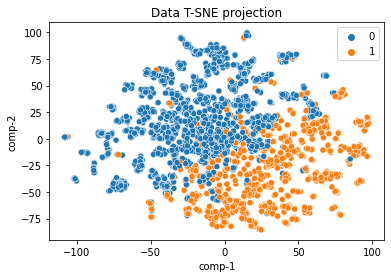

In [60]:
df_train_pred = pd.DataFrame()
df_train_pred["y"] = y_train_pred
df_train_pred["comp-1"] = tsne_train[:,0]
df_train_pred["comp-2"] = tsne_train[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train_pred.y.tolist(),
                data=df_train_pred).set(title="Data T-SNE projection") 

In [62]:
tsne_test = TSNE(init='random', perplexity=10).fit_transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Data T-SNE projection')]

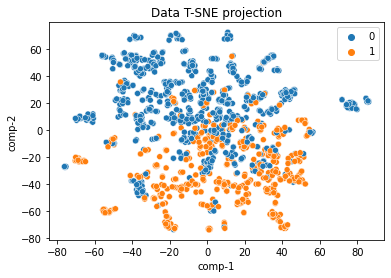

In [63]:
df_test = pd.DataFrame()
df_test["y"] = y_test
df_test["comp-1"] = tsne_test[:,0]
df_test["comp-2"] = tsne_test[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test.y.tolist(),
                data=df_test).set(title="Data T-SNE projection") 

[Text(0.5, 1.0, 'Data T-SNE projection')]

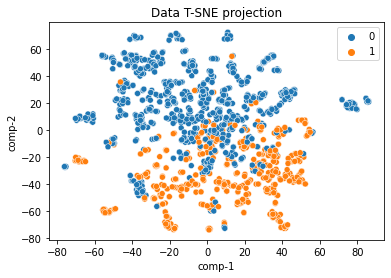

In [64]:
df_test_pred = pd.DataFrame()
df_test_pred["y"] = y_test_pred
df_test_pred["comp-1"] = tsne_test[:,0]
df_test_pred["comp-2"] = tsne_test[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test_pred.y.tolist(),
                data=df_test_pred).set(title="Data T-SNE projection") 

# **KNN-классификатор**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

_KNN = KNeighborsClassifier()
_KNN.fit(x_train, y_train)
y_train_pred = _KNN.predict(x_train)
y_test_pred = _KNN.predict(x_test)

**Расчет общей стоимости, Recall, Precision, F1-measure**

Обучающая выборка


In [10]:
knnAccuracyTrain = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}, " 
      f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_train, y_train_pred, average='weighted')}")

Accuracy: 0.934472049689441, Recall: 0.934472049689441, Precision: 0.9343546863073457


Тестовая выборка

In [11]:
knnAccuracyTest = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}, "
      f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}, "
      f"Precision: {f1_score(y_test, y_test_pred, average='weighted')}")

Accuracy: 0.8921071687183201, Recall: 0.8921071687183201, Precision: 0.8916732822975137


**Рассмотреть различное число ближайших соседей, различные метрики
для вычисления расстояний между объектами, различные правила
голосования**.

In [19]:
gridParameters = {'weights': ['distance', 'uniform'], 
                  'n_neighbors': [2, 4, 8, 16, 32],
                  'metric' : ['manhattan', 'euclidean', 'chebyshev', 'minkowski']}
gridSearch = GridSearchCV(KNeighborsClassifier(), gridParameters, verbose=1, cv=3, n_jobs=-1)
gridSearchResults = gridSearch.fit(x_train, y_train)
gridSearchBestTrainKNN = gridSearchResults.best_score_
gridSearchBestTestKNN = accuracy_score(gridSearchResults.predict(x_test), y_test)
print(f"Grid search best score: {gridSearchBestTrainKNN}, \n"
      f"Grid search best parameters: {gridSearchResults.best_params_}")

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Grid search best score: 0.9220500600774151, 
Grid search best parameters: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}


**Визуализация: изобразить объекты разных классов и опорные векторы разных классов разным цветом**

In [21]:
tsne_train = TSNE(init='random', perplexity=10).fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Data T-SNE projection')]

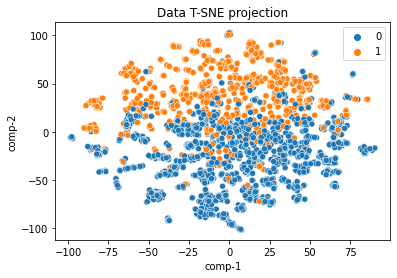

In [22]:
df_train = pd.DataFrame()
df_train["y"] = y_train
df_train["comp-1"] = tsne_train[:,0]
df_train["comp-2"] = tsne_train[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train.y.tolist(),
                data=df_train).set(title="Data T-SNE projection") 

[Text(0.5, 1.0, 'Data T-SNE projection')]

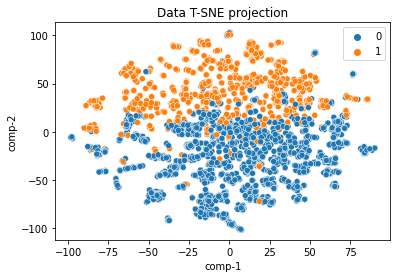

In [23]:
df_train_pred = pd.DataFrame()
df_train_pred["y"] = y_train_pred
df_train_pred["comp-1"] = tsne_train[:,0]
df_train_pred["comp-2"] = tsne_train[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train_pred.y.tolist(),
                data=df_train_pred).set(title="Data T-SNE projection") 

In [24]:
tsne_test = TSNE(init='random', perplexity=10).fit_transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Data T-SNE projection')]

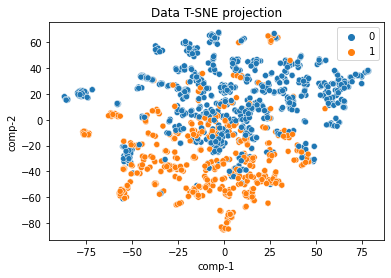

In [26]:
df_test = pd.DataFrame()
df_test["y"] = y_test
df_test["comp-1"] = tsne_test[:,0]
df_test["comp-2"] = tsne_test[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test.y.tolist(),
                data=df_test).set(title="Data T-SNE projection")

[Text(0.5, 1.0, 'Data T-SNE projection')]

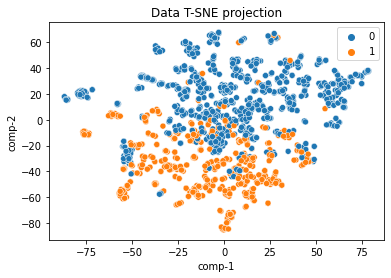

In [27]:
df_test_pred = pd.DataFrame()
df_test_pred["y"] = y_test_pred
df_test_pred["comp-1"] = tsne_test[:,0]
df_test_pred["comp-2"] = tsne_test[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test_pred.y.tolist(),
                data=df_test_pred).set(title="Data T-SNE projection") 

# **RF-классификатор**

In [28]:
from sklearn.ensemble import RandomForestClassifier

_RF = RandomForestClassifier()
_RF.fit(x_train, y_train)
y_train_pred = _RF.predict(x_train)
y_test_pred = _RF.predict(x_test)

**Расчет общей стоимости, Recall, Precision, F1-measure**

Обучающая выборка

In [29]:
rfAccuracyTrain = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}, " 
      f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_train, y_train_pred, average='weighted')}")

Accuracy: 0.9996894409937889, Recall: 0.9996894409937889, Precision: 0.9996894623464785


Тестовая выборка

In [30]:
rfAccuracyTest = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}, "
      f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}, "
      f"Precision: {f1_score(y_test, y_test_pred, average='weighted')}")

Accuracy: 0.9493120926864591, Recall: 0.9493120926864591, Precision: 0.9490792326536361


**Рассмотреть различное число ближайших соседей, различные метрики
для вычисления расстояний между объектами, различные правила
голосования**

In [32]:
gridParameters = {
    'n_estimators' : [5,25,50,100,250],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [2, 4, 8],
    'min_samples_leaf' : [1, 2, 3],
    'bootstrap' : [True, False]
}
gridSearch = GridSearchCV(RandomForestClassifier(), gridParameters, verbose=1, cv=3, n_jobs=-1)
gridSearchResults = gridSearch.fit(x_train, y_train)
gridSearchBestTrainRF = gridSearchResults.best_score_
gridSearchBestTestRF = accuracy_score(gridSearchResults.predict(x_test), y_test)
print(f"Grid search best score: {gridSearchBestTrainRF}, \n"
      f"Grid search best parameters: {gridSearchResults.best_params_}")

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Grid search best score: 0.9515519179360443, 
Grid search best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}


**Визуализация: изобразить объекты разных классов и опорные векторы разных классов разным цветом**

In [35]:
tsne_train = TSNE(init='random', perplexity=10).fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Data T-SNE projection')]

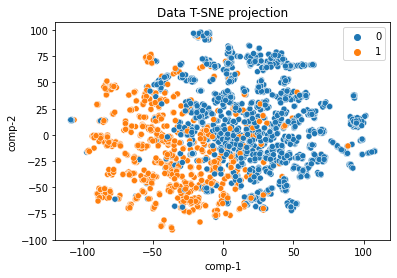

In [36]:
df_train = pd.DataFrame()
df_train["y"] = y_train
df_train["comp-1"] = tsne_train[:,0]
df_train["comp-2"] = tsne_train[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train.y.tolist(),
                data=df_train).set(title="Data T-SNE projection") 

[Text(0.5, 1.0, 'Data T-SNE projection')]

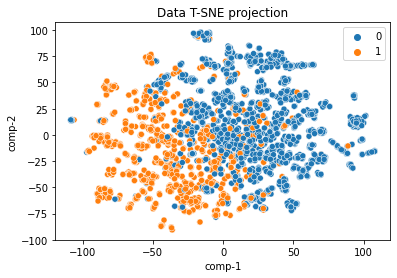

In [38]:
df_train_pred = pd.DataFrame()
df_train_pred["y"] = y_train_pred
df_train_pred["comp-1"] = tsne_train[:,0]
df_train_pred["comp-2"] = tsne_train[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_train_pred.y.tolist(),
                data=df_train_pred).set(title="Data T-SNE projection") 

In [40]:
tsne_test = TSNE(init='random', perplexity=10).fit_transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Data T-SNE projection')]

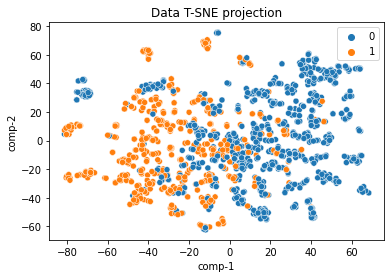

In [41]:
df_test = pd.DataFrame()
df_test["y"] = y_test
df_test["comp-1"] = tsne_test[:,0]
df_test["comp-2"] = tsne_test[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test.y.tolist(),
                data=df_test).set(title="Data T-SNE projection") 

[Text(0.5, 1.0, 'Data T-SNE projection')]

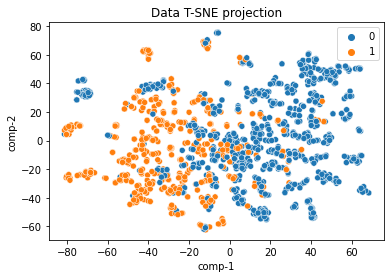

In [42]:
df_test_pred = pd.DataFrame()
df_test_pred["y"] = y_test_pred
df_test_pred["comp-1"] = tsne_test[:,0]
df_test_pred["comp-2"] = tsne_test[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_test_pred.y.tolist(),
                data=df_test_pred).set(title="Data T-SNE projection") 

# **Сравнение**

**по времени**

Elapsed time in seconds
SVM: 0.28590822219848633
KNN: 0.0010921955108642578
RF: 0.5729072093963623


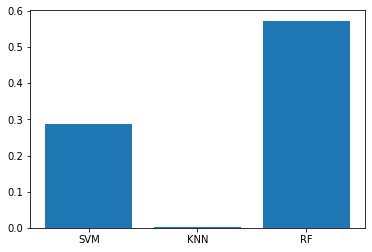

In [53]:
timeSVMStart= time.time()
_SVM.fit(x_train, y_train)
timeSVMStop = time.time()
timeSVM = timeSVMStop-timeSVMStart

timeKNNStart= time.time()
_KNN.fit(x_train, y_train)
timeKNNStop = time.time()
timeKNN = timeKNNStop-timeKNNStart


timeRFStart= time.time()
_RF.fit(x_train, y_train)
timeRFStop = time.time()
timeRF = timeRFStop-timeRFStart

time_data = [timeSVM, timeKNN, timeRF]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, time_data)
print(f"Elapsed time in seconds\nSVM: {timeSVM}\nKNN: {timeKNN}\nRF: {timeRF}")


**по точности**

обучающая выборка

Train accuracy
SVM: 0.9465838509316771
KNN: 0.934472049689441
RF: 0.9996894409937889


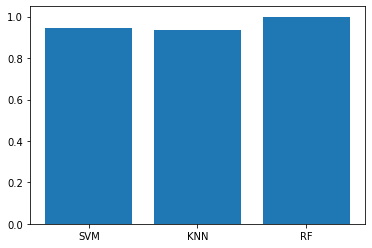

In [60]:
accuracyDataTrain = [svmAccuracyTrain, knnAccuracyTrain, rfAccuracyTrain]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, accuracyDataTrain)
print(f"Train accuracy\nSVM: {svmAccuracyTrain}\nKNN: {knnAccuracyTrain}\nRF: {rfAccuracyTrain}")

тестовая выборка

Test accuracy
SVM: 0.9362780593772628
KNN: 0.8921071687183201
RF: 0.9493120926864591


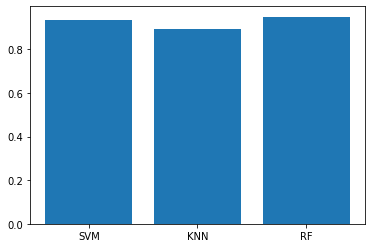

In [61]:
accuracyDataTest = [svmAccuracyTest, knnAccuracyTest, rfAccuracyTest]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, accuracyDataTest)
print(f"Test accuracy\nSVM: {svmAccuracyTest}\nKNN: {knnAccuracyTest}\nRF: {rfAccuracyTest}")

**точность после сеточного перебора**

обучающая выборка

Test accuracy
SVM: 0.930125945633555
KNN: 0.9220500600774151
RF: 0.9515519179360443


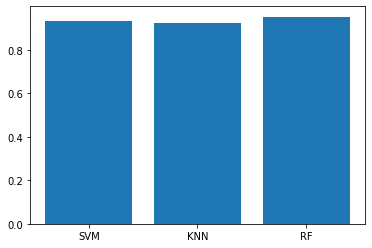

In [62]:
gridSearchAccuracyDataTrain = [gridSearchBestTrainSVM, gridSearchBestTrainKNN, gridSearchBestTrainRF]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, gridSearchAccuracyDataTrain)
print(f"Test accuracy\nSVM: {gridSearchBestTrainSVM}\nKNN: {gridSearchBestTrainKNN}\nRF: {gridSearchBestTrainRF}")

тестовая выборка

Test accuracy
SVM: 0.9377262853005068
KNN: 0.9051412020275162
RF: 0.9536567704561911


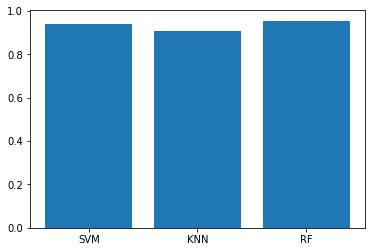

In [63]:
gridSearchAccuracyDataTest = [gridSearchBestTestSVM, gridSearchBestTestKNN, gridSearchBestTestRF]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, gridSearchAccuracyDataTest)
print(f"Test accuracy\nSVM: {gridSearchBestTestSVM}\nKNN: {gridSearchBestTestKNN}\nRF: {gridSearchBestTestRF}")